# Pre-processing 

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pycaret
import seaborn as sns

In [2]:
#load dataframe
#parse datetime column
df=pd.read_csv('state_cov_weather2.csv', parse_dates=[0])
df.set_index('date', inplace= True)

In [3]:
df.head()

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_Avg_Temp(F),CT_PRCP(mm),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday
date,,,,,,,,,,,,,
2020-03-01,19.58,0.3,14.18,0.3,26.24,0.0,26.42,0.0,0.0,0.0,0.0,1.0,6
2020-03-02,32.00,0.0,17.06,4.6,37.58,0.0,36.50,0.0,0.0,0.0,0.0,1.0,0
2020-03-03,44.06,2.8,39.56,0.0,51.26,3.8,55.94,0.0,0.0,0.0,0.0,1.0,1
2020-03-04,41.54,0.0,32.00,6.6,48.02,0.0,46.94,2.5,0.0,0.0,0.0,2.0,2
2020-03-05,37.04,0.0,30.02,0.0,43.16,0.0,42.98,0.0,0.0,0.0,0.0,8.0,3


In [4]:
df_vt=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [5]:
df_me=df.drop(columns=['VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [6]:
df_ma=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases','weekday'])

In [7]:
df_ct= df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

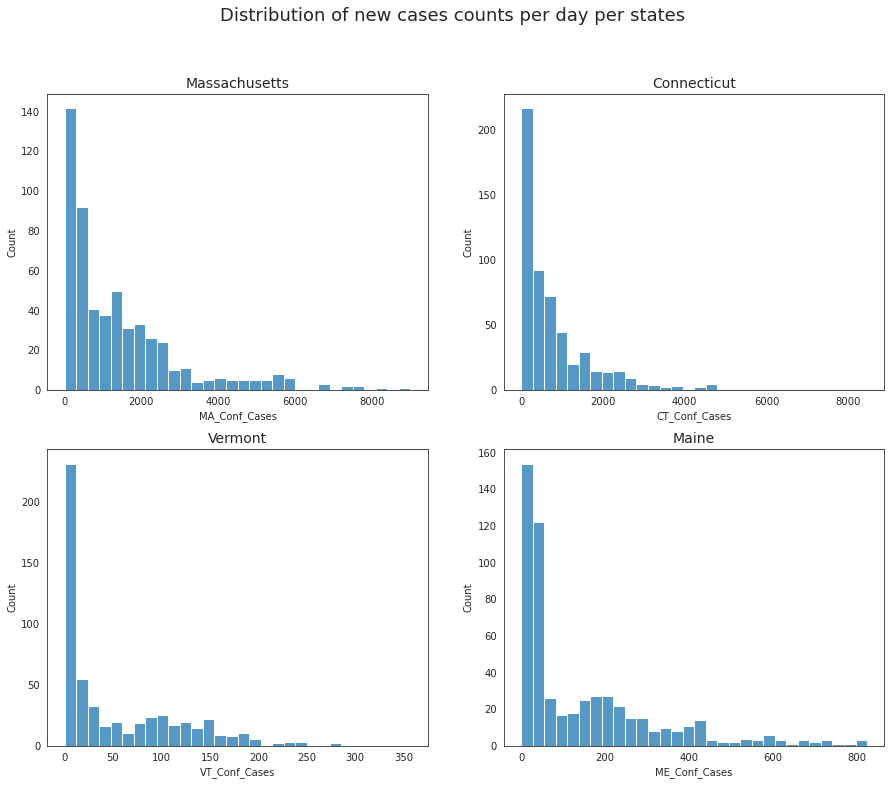

In [8]:
#Let's take a look at the distribution of case counts for MA
with sns.axes_style("white"):
    fig, axes = plt.subplots(2,2, figsize=(15,12))
    fig.suptitle('Distribution of new cases counts per day per states', fontsize=18)
    axes[0,0].set_title('Massachusetts', fontsize=14)
    axes[0,1].set_title('Connecticut', fontsize =14)
    axes[1,0].set_title('Vermont', fontsize= 14)
    axes[1,1].set_title('Maine', fontsize= 14)
    # Massachusetts
    sns.histplot(ax=axes[0, 0], x=df_ma.MA_Conf_Cases, bins=30, palette = 'Blues')
    # Connecticut
    sns.histplot(ax=axes[0, 1], x=df_ct.CT_Conf_Cases, bins=30, palette = 'Blues')
    # Vermont
    sns.histplot(ax=axes[1, 0], x=df_vt.VT_Conf_Cases,bins=30, palette = 'Blues')
    # Maine
    sns.histplot(ax=axes[1, 1], x=df_me.ME_Conf_Cases, bins=30, palette = 'Blues')

Let's start off by defining a function for running and printing the Augmented Dickey Fuller Test:

In [ ]:
#def ADF_test(df, column_name):
    #res = adfuller(df[column_name])
    #print(column_name, "ADF: ", res)

#### Vermont Initial Augmented Dickey Fuller scores:

In [ ]:
#ADF_test(df_vt, 'VT_Conf_Cases')

In [ ]:
#ADF_test(df_vt, 'VT_Avg_Temp(F)')

In [ ]:
#ADF_test(df_vt, 'VT_PRCP(mm)')

***

#### Connecticut Initial Augmented Dickey Fuller scores:

In [ ]:
#ADF_test(df_ct, 'CT_Conf_Cases')

In [ ]:
#ADF_test(df_ct, 'CT_Avg_Temp(F)')

In [ ]:
#ADF_test(df_ct, 'CT_PRCP(mm)')

***

#### Massachusetts Initial Augmented Dickey Fuller scores:

In [ ]:
#ADF_test(df_ma, 'MA_Conf_Cases')

In [ ]:
#ADF_test(df_ma, 'MA_Avg_Temp(F)')

In [ ]:
#ADF_test(df_ma, 'MA_PRCP(mm)')

***

#### Maine Initial Augmented Dickey Fuller scores:

In [ ]:
#ADF_test(df_me, 'ME_Conf_Cases')

In [ ]:
#ADF_test(df_me, 'ME_Avg_Temp(F)')

In [ ]:
#ADF_test(df_me, 'ME_PRCP(mm)')

***

According to these results, it appears that the only data that is already stationary is `PRCP(mm)`. 
In order to perform time series analysis on **the rest of the data**, we will need to make it stationary as well. 

* __Strong Stationarity:__ entire distribution of data is time-invariant. 
* __Weak Stationarity:__ mean, variance, and autocorrelation are time invariant (easier to test).

We will compute __first differences__ on the remaining data and then recalculate p-value of rejecting the null hyppothesis with ADF test for these data. 

## Define a function that accepts a dict for code below?

In [ ]:
#df_vt['VT_Conf_Cases'] = df_vt['VT_Conf_Cases'].diff()
#df_vt['VT_Avg_Temp(F)'] = df_vt['VT_Avg_Temp(F)'].diff()

In [ ]:
#df_ct['CT_Conf_Cases'] = df_ct['CT_Conf_Cases'].diff()
#df_ct['CT_Avg_Temp(F)'] = df_ct['CT_Avg_Temp(F)'].diff()

In [ ]:
#df_me['ME_Conf_Cases'] = df_me['ME_Conf_Cases'].diff()
#df_me['ME_Avg_Temp(F)'] = df_me['ME_Avg_Temp(F)'].diff()

In [ ]:
#df_ma['MA_Conf_Cases'] = df_ma['MA_Conf_Cases'].diff()
#df_ma['MA_Avg_Temp(F)'] = df_ma['MA_Avg_Temp(F)'].diff()

Quick visual check to see how well the transformations helped stationarize the data:

In [ ]:
#plt.plot(df_vt['VT_Conf_Cases'])
#plt.xticks(rotation=90)
#plt.show()

Because we took first differences of the data sets, the first value of `Conf_Cases` for each state will become `NaN` (there is no data prior to the first piece of data). 

We cannot perform the ADF test on the datasets if they contain `NaN` values, so we'll have to either remove or replace those values

We could delete the first row of each dataframe, or perform the ADF test from the second row of data on, but there is an even simpler solution to this problem. Each of these states ([Vermont](https://www.vpr.org/vpr-news/2020-03-08/health-officials-announce-first-coronavirus-case-in-vermont), [Massachusetts](https://www.mass.gov/news/first-presumptive-positive-case-of-covid-19-identified-by-massachusetts-state-public-health-laboratory), [Connecticut](https://portal.ct.gov/Office-of-the-Governor/News/Press-Releases/2020/03-2020/Governor-Lamont-Announces-First-Positive-Case-of-Novel-Coronavirus-Involving-a-Connecticut-Resident), [Maine](https://www.maine.gov/covid19/timeline)) had their first respective COVID19 case 1-2 months after the date of the first value. Therefore, we know that on the day before our first data point (namely, 01/21/2021), the number of confirmed cases in each of these states must also have been zero. The difference between zero and zero is obvioulsy zero, so we can confidently replace this particular `NaN` with a zero, and thereby prevent losing a row of data for each state.

In [ ]:
# Confirm first value of VT's cases is NaN:
#print(df_vt.VT_Conf_Cases[0])

In [ ]:
#Replace NaN with 0 for VERMONT:
#df_vt.VT_Conf_Cases[0] = 0
#df_vt['VT_Avg_Temp(F)'][0] = 0
#df_vt.head()

In [ ]:
#Replace NaN with 0 for MAINE:
#df_me.ME_Conf_Cases[0] = 0
#df_me['ME_Avg_Temp(F)'][0] = 0
#df_me.head()

In [ ]:
#Replace NaN with 0 for CONNECTICUT:
#df_ma.MA_Conf_Cases[0] = 0
#df_ma['MA_Avg_Temp(F)'][0] = 0
#df_ma.head()

In [ ]:
#Replace NaN with 0 for MASSACHUSETTS:
#df_ct.CT_Conf_Cases[0] = 0
#df_ct['CT_Avg_Temp(F)'][0] = 0
#df_ct.head()

#### Re-run ADF test for VERMONT

In [ ]:
#ADF_test(df_vt, 'VT_Conf_Cases')

In [ ]:
#ADF_test(df_vt, 'VT_Avg_Temp(F)')

#### Re-run ADF test for MAINE

In [ ]:
#ADF_test(df_me, 'ME_Conf_Cases')

In [ ]:
#ADF_test(df_me, 'ME_Avg_Temp(F)')

#### Re-run ADF test for CONNECTICUT

In [ ]:
#ADF_test(df_ct, 'CT_Conf_Cases')

In [ ]:
#ADF_test(df_ct, 'CT_Avg_Temp(F)')

#### Re-run ADF test for MASSACHUSETTS

In [ ]:
#ADF_test(df_ma, 'MA_Conf_Cases')

In [ ]:
#ADF_test(df_ma, 'MA_Avg_Temp(F)')

Now all of the data appears stationary and we have no more `NaN` values in any of the datasets.

***

In [9]:
# Make duplicates of datasets for processing with Pycaret:
df_vt2 = df_vt.reset_index()
df_ct2 = df_ct.reset_index()
df_me2 = df_me.reset_index()
df_ma2 = df_ma.reset_index()

In [ ]:
#df_ma3 = df_ma2[df_ma2['date']< '2021-03-01']
#df_ct3 = df_ct2[df_ct2['date']< '2021-03-01']
#df_me3 = df_me2[df_me2['date']< '2021-03-01']
#df_vt3 = df_vt2[df_vt2['date']< '2021-03-01']

In [10]:
df_ma3 = df_ma2
df_ct3 = df_ct2
df_me3 = df_me2
df_vt3 = df_vt2

In [11]:
df_list = [df_ct3, df_ma3, df_me3, df_vt3]

In [12]:
# Add 'day_of_week' and 'day_of_year' columns to each dataframe
for df in df_list:
    df['day_of_week'] = [i.dayofweek for i in df['date']]
    df['day_of_year'] = [i.dayofyear for i in df['date']]
    df['Year'] =[i.year for i in df['date']]
    df['Month'] = [i.month for i in df['date']]
    df['Day'] = [i.day for i in df['date']]

# US Census Bureau state populations
* Massachusetts: 7,029,917 
* Vermont: 643,077	
* Connecticut: 3,605,944	
* Maine: 1,362,359

Source: [U.S. Census Bureau](https://www.census.gov/quickfacts/fact/table/VT,CT,MA,ME/PST045219) April 1, 2020 Census.

Because some states are very densely populated, while others are much more sparsely populated, I'll calculate confirmed Covid cases as a percentage of overall population. 

In order to do this, I'll divide by the appropriate state's total population (as per the April 1, 2020 U.S. Census Bureau), and multiply by 100,000 for ten thousandths of a percent. 

In [13]:
df_ma3['new_case_percent_pop*'] = (df_ma3['MA_Conf_Cases'] / 70.29917)

In [14]:
df_ct3['new_case_percent_pop*'] = (df_ct3['CT_Conf_Cases'] / 36.05944)

In [15]:
df_me3['new_case_percent_pop*'] = (df_me3['ME_Conf_Cases'] / 13.62359)

In [16]:
df_vt3['new_case_percent_pop*'] = (df_vt3['VT_Conf_Cases'] / 6.43077)

Try the model using new cases as ten thousandths of a percent of population, rather than count.

In [17]:
from pycaret.regression import *
all_results=[]
df_subset = df_ma3

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'new_case_percent_pop*', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'MA_Conf_Cases', 'MA_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'MA_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=False)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("MA")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

In [18]:
concat_results = pd.concat(all_results,axis=0)
concat_results.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
catboost,CatBoost Regressor,4.5939,61.0005,7.7753,0.8719,0.4384,2.5186,0.2167,MA


In [19]:
all_results=[]
df_subset = df_ct3

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'new_case_percent_pop*', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'CT_Conf_Cases', 'CT_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'CT_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("CT")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [20]:
concat_results = pd.concat([pd.concat(all_results, axis=0), concat_results], axis=0)
concat_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
et,Extra Trees Regressor,7.4040,182.1191,13.2260,0.8056,0.5065,0.7059,0.0600,CT
catboost,CatBoost Regressor,4.5939,61.0005,7.7753,0.8719,0.4384,2.5186,0.2167,MA


In [21]:
all_results=[]
df_subset = df_vt3

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'new_case_percent_pop*', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'VT_Conf_Cases', 'VT_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'VT_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("VT")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [22]:
concat_results = pd.concat([pd.concat(all_results, axis=0), concat_results], axis=0)
concat_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
rf,Random Forest Regressor,2.8472,26.8464,5.1796,0.7306,0.4531,0.7380,0.0800,VT
et,Extra Trees Regressor,7.4040,182.1191,13.2260,0.8056,0.5065,0.7059,0.0600,CT
catboost,CatBoost Regressor,4.5939,61.0005,7.7753,0.8719,0.4384,2.5186,0.2167,MA


In [23]:
all_results=[]
df_subset = df_me3

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'new_case_percent_pop*', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'ME_Conf_Cases', 'ME_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year','ME_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("ME")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

In [24]:
concat_results = pd.concat([pd.concat(all_results, axis=0), concat_results], axis=0)
concat_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
catboost,CatBoost Regressor,3.0496,26.9742,5.1533,0.8163,0.4091,1.0260,0.2167,ME
rf,Random Forest Regressor,2.8472,26.8464,5.1796,0.7306,0.4531,0.7380,0.0800,VT
et,Extra Trees Regressor,7.4040,182.1191,13.2260,0.8056,0.5065,0.7059,0.0600,CT
catboost,CatBoost Regressor,4.5939,61.0005,7.7753,0.8719,0.4384,2.5186,0.2167,MA


***